In [150]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install pickle
%pip install joblib
%pip install hmmlearn
%pip install skl_hmm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skl_hmm (from versions: none)
ERROR: No matching distribution found for skl_hmm

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import StackingClassifier
from hmm_skl import HMMBinaryClassifier


In [152]:
#models

import joblib
import pickle

#error handling
try:
    pipeline_object = joblib.load('../hmm_multilabel_pipeline.joblib')
    pickle_file = 'hmm_multilabel_pipeline.pkl'

    with open(pickle_file, 'wb') as pkl_file:
        pickle.dump(pipeline_object, pkl_file)
except FileNotFoundError:
    print(f"Error: The file '../../models/hmm_multilabel_pipeline.joblib' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


rf_model_best = joblib.load('../models/best_rf_model.pkl')
log_reg_model = joblib.load('../models/logistic_regression_model.pkl')
gbdt_model_best = joblib.load('../models/best_gbdt_model.pkl')


c:\Users\fagun\repos\heart-disease-model\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.7.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\fagun\repos\heart-disease-model\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\fagun\repos\heart-disease-model\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier

In [153]:
hmm_model = joblib.load('../models/hmm_multilabel_pipeline.pkl')
type(hmm_model)


dict

In [154]:
#saving data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')



# y_train.columns
y_train = y_train.drop('Unnamed: 0',axis = 1)
y_test = y_test.drop('Unnamed: 0',axis = 1)

In [155]:

base_estimators = [
    ('gbdt',gbdt_model_best),
    ('rf',rf_model_best),
    ('log reg',log_reg_model)
    #('hmm model',hmm_model)
]


from sklearn.multiclass import OneVsRestClassifier

stacking = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=2000),
    passthrough=True
)

multi_label_stacking = OneVsRestClassifier(stacking)


multi_label_stacking

,estimator,StackingClass...sthrough=True)
,n_jobs,None
,verbose,0
,loss,'log_loss'
,learning_rate,0.2
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [156]:
import numpy as np
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.base import ClassifierMixin

# 1) y must be a 2D 0/1 array (n_samples, n_labels)
y_train = (y_train.astype(int) if hasattr(y_train, "astype") else y_train).copy()
assert getattr(y_train, "ndim", np.asarray(y_train).ndim) == 2, f"y_train must be 2D, got {getattr(y_train, 'ndim', np.asarray(y_train).ndim)}D"

# 2) Base classifiers ONLY (no regressors, no HMM unless wrapped as a classifier)
gbdt = GradientBoostingClassifier(random_state=100)
rf   = RandomForestClassifier(random_state=100)
logr = LogisticRegression(max_iter=2000)

stacking = StackingClassifier(
    estimators=[('gbdt', gbdt), ('rf', rf), ('logreg', logr)],
    final_estimator=LogisticRegression(max_iter=2000),
    stack_method='predict_proba',
    passthrough=True,
    n_jobs=-1
)

# 3) Wrap for multilabel: one classifier per column
multi_label_stacking = MultiOutputClassifier(stacking, n_jobs=-1)

# 4) Sanity-check that EVERYTHING is a classifier
for name, est in stacking.estimators:
    assert isinstance(est, ClassifierMixin), f"{name} is not a classifier: {type(est)}"
assert isinstance(stacking.final_estimator, ClassifierMixin), f"final_estimator is not a classifier: {type(stacking.final_estimator)}"

# 5) Fit
multi_label_stacking.fit(X_train, y_train)


,estimator,StackingClass...redict_proba')
,n_jobs,-1
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3


In [157]:
y_stat = multi_label_stacking.predict(X_test)
y_prob = multi_label_stacking.predict_proba(X_test)

def to_2d_proba(proba):
    # list of (n_samples, 2) -> (n_samples, n_labels) taking P(class=1)
    if isinstance(proba, list):
        return np.column_stack([(p[:, 1] if p.ndim == 2 else p) for p in proba])
    # (n_labels, n_samples, 2) -> (n_samples, n_labels)
    if isinstance(proba, np.ndarray) and proba.ndim == 3 and proba.shape[-1] == 2:
        return proba[:, :, 1].T
    # already (n_samples, n_labels)
    return proba

y_prob = to_2d_proba(y_prob)

In [158]:
#Getting Accuracy score
from sklearn.metrics import accuracy_score

subset_acc = accuracy_score(y_test, y_stat)
print(f"Subset accuracy: {subset_acc:.4f}")


Subset accuracy: 0.4672


In [159]:
#Classification report of ensemble model
from sklearn.metrics import classification_report

label_names = y_test.columns
print(classification_report(y_test, y_stat, target_names=label_names))


              precision    recall  f1-score   support

          AS       0.76      0.65      0.70       104
          AR       0.77      0.62      0.69       114
          MR       0.72      0.48      0.57        90
          MS       0.75      0.71      0.73        85
           N       0.96      0.96      0.96        45

   micro avg       0.78      0.65      0.71       438
   macro avg       0.79      0.68      0.73       438
weighted avg       0.77      0.65      0.70       438
 samples avg       0.73      0.69      0.68       438



c:\Users\fagun\repos\heart-disease-model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [160]:
#Hamming Loss
from sklearn.metrics import hamming_loss

hloss = hamming_loss(y_test, y_stat)
print(f"Hamming loss: {hloss:.4f}")


Hamming loss: 0.1815


In [161]:
#F1 scores
from sklearn.metrics import f1_score

micro_f1 = f1_score(y_test, y_stat, average="micro")
macro_f1 = f1_score(y_test, y_stat, average="macro")

print(f"Micro F1 score: {micro_f1:.4f}")
print(f"Macro F1 score: {macro_f1:.4f}")


Micro F1 score: 0.7081
Macro F1 score: 0.7293


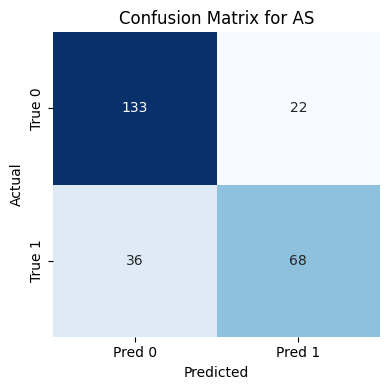

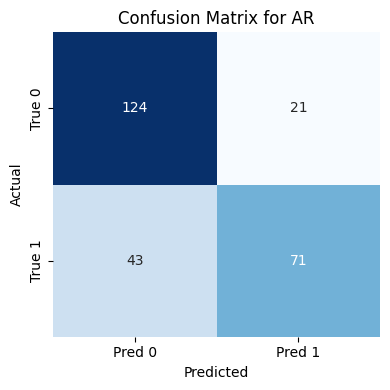

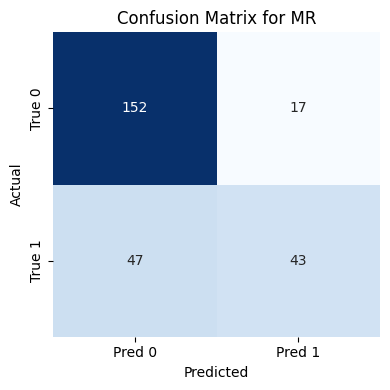

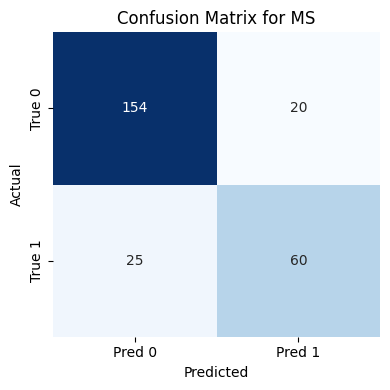

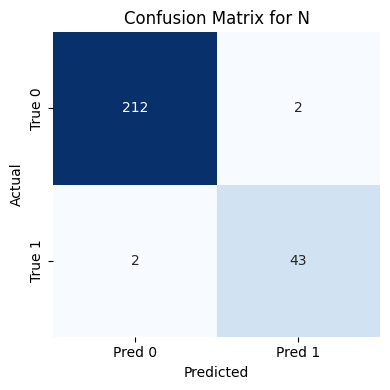

In [162]:
#Visualizing Ensemble Model's Performance

from sklearn.metrics import multilabel_confusion_matrix

# Generate the confusion matrices
conf_matrices = multilabel_confusion_matrix(y_test, y_stat)

for i, cm in enumerate(conf_matrices):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {label_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()



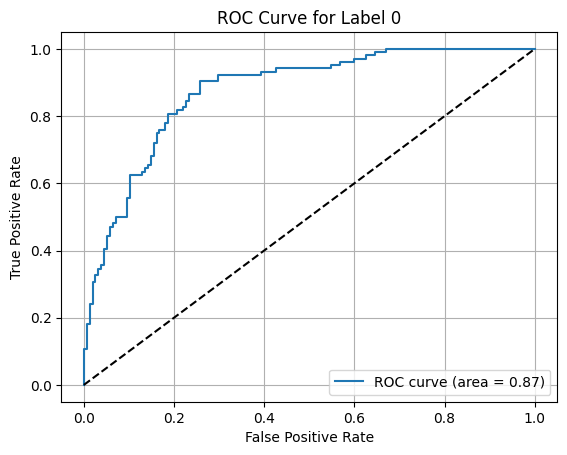

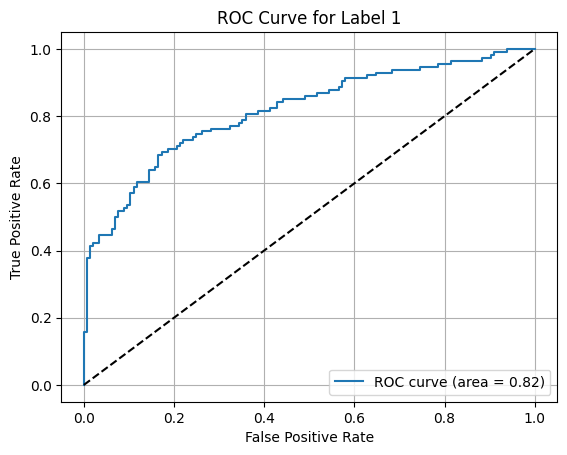

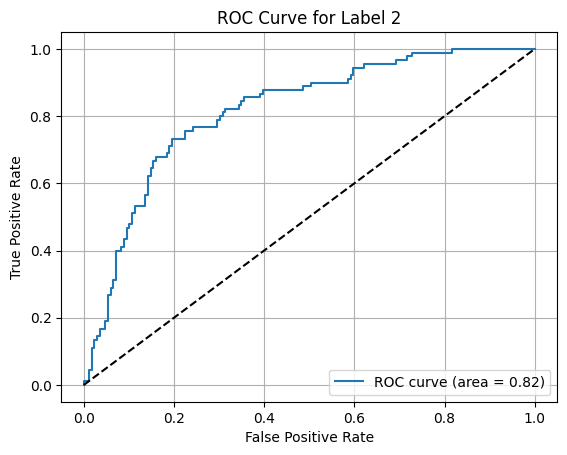

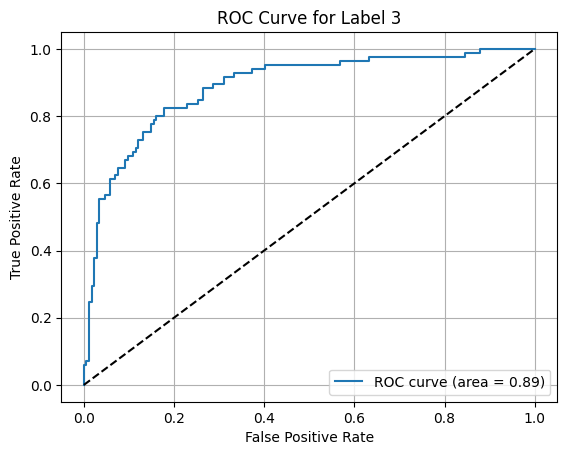

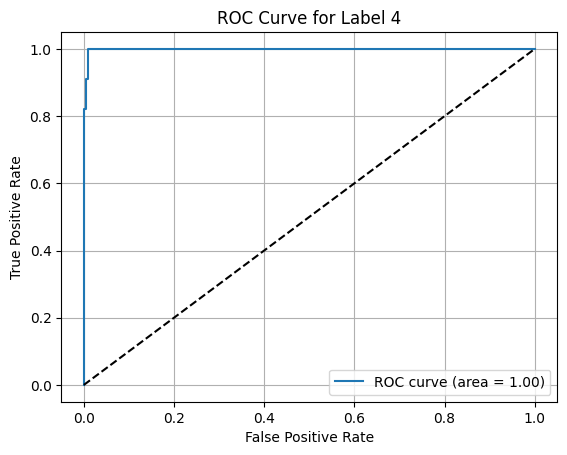

In [163]:
from sklearn.metrics import roc_curve, auc

for i in range(y_test.shape[1]):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Label {i}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


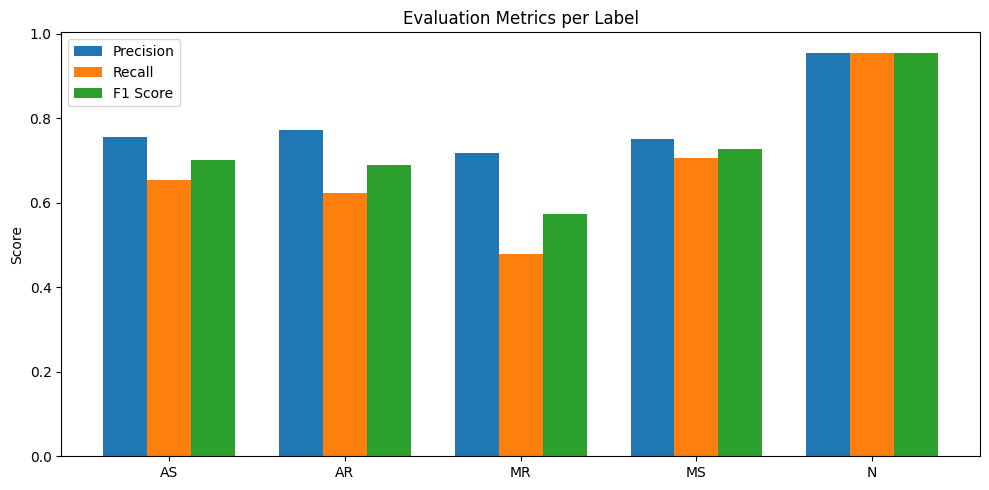

In [164]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_stat, average=None)
recall = recall_score(y_test, y_stat, average=None)
f1 = f1_score(y_test, y_stat, average=None)

labels = y_test.columns

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 5))

plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Evaluation Metrics per Label')
plt.legend()
plt.tight_layout()
plt.show()


In [165]:

import numpy as np, joblib, sklearn, time
from sklearn.metrics import precision_score, recall_score, f1_score

final_model = multi_label_stacking  # or multi_label_stacking if that's your final
feature_cols = list(X_train.columns)

num_cols = X_train.select_dtypes(include=np.number).columns
medians = X_train[num_cols].median().astype(float).to_dict()
means   = X_train[num_cols].mean().astype(float).to_dict()

metrics = {
    "labels": list(y_train.columns),

    "per_label": {
        "precision": np.asarray(precision).tolist(),
        "recall":    np.asarray(recall).tolist(),
        "f1":        np.asarray(f1).tolist(),
    },
    "micro": {
        "precision": precision_score(y_test, y_stat, average="micro"),
        "recall":    recall_score(y_test, y_stat, average="micro"),
        "f1":        f1_score(y_test, y_stat, average="micro"),
    },
    "macro": {
        "precision": precision_score(y_test, y_stat, average="macro"),
        "recall":    recall_score(y_test, y_stat, average="macro"),
        "f1":        f1_score(y_test, y_stat, average="macro"),
    },
}

bundle = {
    "model": final_model,                 # the estimator you trained
    "feature_cols": feature_cols,         # exact training feature order
    "labels": getattr(final_model, "classes_", None),
    "feature_defaults": {                 # training stats for inference-time imputation
        "median": medians,
        "mean": means,
    },
    "metrics": metrics,                   # evaluation you computed
    "meta": {                             # lightweight provenance
        "sklearn_version": sklearn.__version__,
        "created_at": time.strftime("%Y-%m-%d %H:%M:%S"),
    },
}

joblib.dump(bundle, "final_stacked_classifier_model_bundle.pkl", compress=3)


['final_stacked_classifier_model_bundle.pkl']